Name: Raymond Mc Creesh

Student ID : 15211428

Text(0.5, 0, 'Episodes')

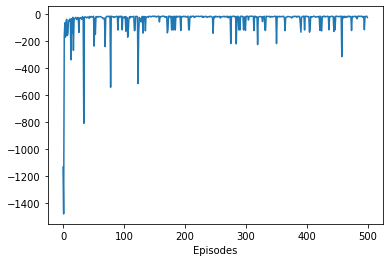

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld environment
WORLD_HEIGHT = 4
WORLD_WIDTH = 12
START_STATE = (0, 0)
GOAL_STATE = (0, 11)
CLIFF_STATES = [(0, i) for i in range(0, 11)]
ACTIONS = ['up', 'down', 'left', 'right']
EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1.0
EPISODES = 500


# Define the Sarsa algorithm
def sarsa(Q):
    state = START_STATE
    # Choose the action to take in the current state, using an epsilon-greedy policy
    if np.random.uniform() < EPSILON:
        # choose a random action
        action = np.random.choice(ACTIONS)
    else:
        # choose action with highest Q values for current state
        values = Q[state[0], state[1], :]
        action = ACTIONS[np.argmax(values)]
    sarsa_reward = 0
    while state != GOAL_STATE:
        # choose next action, watch result  and reward
        next_state, reward = step(state, action)
        if np.random.uniform() < EPSILON:
            next_action = np.random.choice(ACTIONS)
        else:
            values = Q[next_state[0], next_state[1], :]
            next_action = ACTIONS[np.argmax(values)]
        # Update the Q-value for the current SA using the SARSA update rule
        Q[state[0], state[1], ACTIONS.index(action)] += ALPHA * \
            (reward + GAMMA * Q[next_state[0], next_state[1], ACTIONS.index(next_action)] - \
             Q[state[0], state[1], ACTIONS.index(action)])
        # update current state and action
        state = next_state
        action = next_action
        sarsa_reward += reward
        if state == GOAL_STATE:
            break
    return sarsa_reward


# Define the step function
def step(state, action):
    i, j = state
    if action == 'up':
        next_state = max(i - 1, 0), j
    elif action == 'down':
        next_state = min(i + 1, WORLD_HEIGHT - 1), j
    elif action == 'left':
        next_state = i, max(j - 1, 0)
    elif action == 'right':
        next_state = i, min(j + 1, WORLD_WIDTH - 1)
    if next_state in CLIFF_STATES:
        reward = -100
        next_state = START_STATE
    elif next_state == GOAL_STATE:
        reward = 0
    else:
        reward = -1
    return next_state, reward

# Initialize the Q-table with random values for each state-action pair
sarsa_table = np.random.rand(WORLD_HEIGHT, WORLD_WIDTH, len(ACTIONS))

sarsa_rewards = []
# Run the SARSA algorithm
for episode in range(EPISODES):
    sarsa_reward = sarsa(sarsa_table)
    sarsa_rewards.append(sarsa_reward)

# Plot the results
plt.plot(sarsa_rewards, label='Sarsa')
plt.xlabel('Episodes')


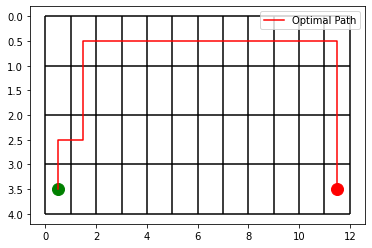

In [3]:
#get the optimal path based on the Q-table
def get_optimal_path(Q):
    state = START_STATE
    #initialise at start state
    optimal_path = [state]
    while state != GOAL_STATE:
        # Get the Q-values for the current state and all possible actions
        values = Q[state[0], state[1], :]
        # Choose the action with the highest Q-value
        action = ACTIONS[np.argmax(values)]
        # move to the next state with the highest action
        next_state, _ = step(state, action)
        optimal_path.append(next_state)
        state = next_state
    return optimal_path

# Define grid coords
x_coords = np.arange(WORLD_WIDTH+1)
y_coords = np.arange(WORLD_HEIGHT+1)

# Create a grid with vertical and horizontal lines
plt.hlines(y=y_coords, xmin=0, xmax=WORLD_WIDTH, colors='k', linestyles='solid')
plt.vlines(x=x_coords, ymin=0, ymax=WORLD_HEIGHT, colors='k', linestyles='solid')

# Add the start and goal states as green and red circles
plt.plot(START_STATE[1]+0.5, WORLD_HEIGHT-1-START_STATE[0]+0.5, 'go', markersize=12)
plt.plot(GOAL_STATE[1]+0.5, WORLD_HEIGHT-1-GOAL_STATE[0]+0.5, 'ro', markersize=12)

# Plot the optimal path as a red line
optimal_path = get_optimal_path(sarsa_table)
x_vals = [s[1]+0.5 for s in optimal_path]
y_vals = [WORLD_HEIGHT-1-s[0]+0.5 for s in optimal_path]
plt.plot(x_vals, y_vals, 'r', label='Optimal Path')

# flip axis
plt.gca().invert_yaxis()

# Show the plot
plt.legend()
plt.show()

